# Jon Williamson

## Preprocessing




In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Reading the data:

In [29]:
df = pd.read_csv('svd_imputed_master_data.csv', index_col=0)
#df.fillna(0, inplace=True)
df.head(5)

,Coach Name,Year,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Avg 2Y Win Pct,Coach Tenure Class
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,Aaron Glenn,2025,53,0,0,0,0,5,4,0,...,-0.012856,-1.263665,-1.187244,-1.102638,-1.624895,0.092283,0.710263,0.0,0.410947,-1
1,Abe Gibron,1972,47,0,0,0,0,12,0,0,...,-0.046360,-1.485902,0.771470,-1.631151,0.145324,0.379353,0.653824,0.0,0.267857,1
2,Adam Gase,2016,38,0,0,0,0,5,3,0,...,0.327322,-0.366410,0.290591,-0.152661,-0.031052,-0.493436,-0.449901,0.0,0.500000,1
3,Adam Gase,2019,41,1,0,0,0,5,3,3,...,1.049007,-1.094508,0.825019,-0.949633,0.344443,-0.329186,0.910021,0.0,0.281250,0
4,Adam Walsh,1945,44,0,8,0,12,0,0,0,...,0.671841,-0.169465,1.121897,-0.060971,1.112303,1.146577,0.854598,0.0,0.745455,0


Because the feature names are complex, the stored data labels them only by feature number. The following table maps feature labels to descriptions of each feature.

There are many key takeaways from this set of features. Firstly, the feature set will be sparse for a given data point because no coach has ever been  an offensive coordinator and a defensive coordiantor prior to hiring. Secondly, features 9-140 and 142-150 were normalized using a z-score transformation vs. all teams in the league in that year. This normalization  roughly account for differences in play style over time because performance is always relative to other teams in the league at that time.

Prior to building the model, it is important to understand the distribution of data. The following code plots the distribution of average 2 year winning percentage for the entire data set.

In [30]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 13
plt.rc('axes', titlesize=18) 
plt.rc('axes', labelsize=18) 
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rcParams['font.family'] = "Times New Roman"

In [31]:
df = df[df['Coach Tenure Class'] != -1]
"""
temp_df = df.iloc[:,2:76].join(df.iloc[:,142:-2])
print(temp_df.head(5))
"""
X = df.iloc[:,2:-2]
y = df.iloc[:,-1]
X.head(5)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,47,0,0,0,0,12,0,0,0.438842,0.417777,...,0.428571,-0.956368,-0.046360,-1.485902,0.771470,-1.631151,0.145324,0.379353,0.653824,0.000000
2,38,0,0,0,0,5,3,0,1.532619,1.348807,...,0.437500,-0.268496,0.327322,-0.366410,0.290591,-0.152661,-0.031052,-0.493436,-0.449901,0.000000
3,41,1,0,0,0,5,3,3,1.532619,1.348807,...,0.281250,-0.656092,1.049007,-1.094508,0.825019,-0.949633,0.344443,-0.329186,0.910021,0.000000
4,44,0,8,0,12,0,0,0,0.481277,0.481733,...,0.400000,0.116123,0.671841,-0.169465,1.121897,-0.060971,1.112303,1.146577,0.854598,0.000000
5,25,0,0,0,0,0,0,0,0.418365,0.518853,...,0.375848,-0.430732,0.206445,-0.098774,0.128207,-0.372318,0.232741,-0.182801,0.195872,0.252686


In [32]:
y.head(5)

Unnamed: 0
1    1
2    1
3    0
4    0
5    0
Name: Coach Tenure Class, dtype: int64

The `create_data.py` file segments coach tenure into three classes as such:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt">Coach Hire Duration (Years)</th>
    <th class="tg-fymr">Class Label</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">1-2</td>
    <td class="tg-0pky">0</td>
  </tr>
  <tr>
    <td class="tg-c3ow">3-4</td>
    <td class="tg-0pky">1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">5+</td>
    <td class="tg-0pky">2</td>
  </tr>
</tbody>
</table>

(array([311., 170., 154.]), array([-0.5,  0.5,  1.5,  2.5]), <a list of 3 Patch objects>)


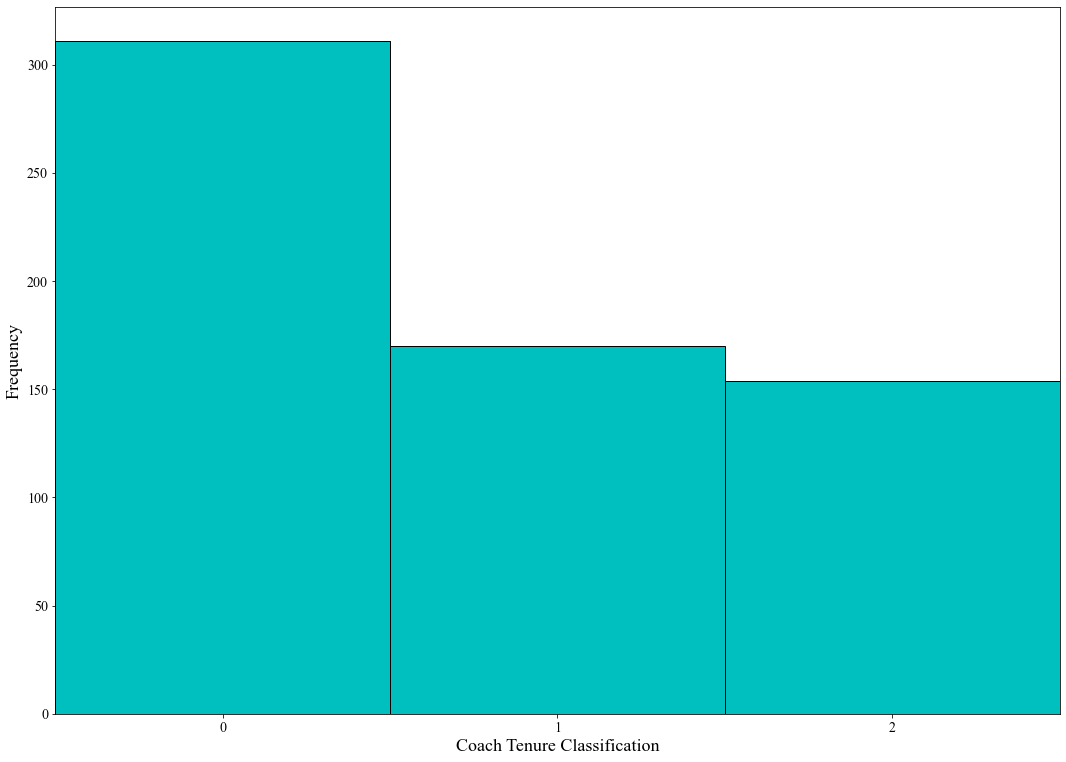

In [33]:
#rcParams['figure.figsize'] = 9, 6.5
raw_coach_class = y.values.T
raw_coach_class_mean = np.mean(raw_coach_class)
print(plt.hist(raw_coach_class, bins=[-.5,.5,1.5,2.5], color='c', edgecolor='k'))
plt.xlim(-0.5,2.5)
plt.xticks(ticks=[0,1,2])
plt.xlabel('Coach Tenure Classification')
plt.ylabel('Frequency')
plt.show()

The following code prints the correlation matrix for the features. This matrix shows that the data is not highly correlated. The white boxes in the matrix show that that offensive and defensive coordinator metrics have no correlation. This is expected, as no coaches in the set were both an OC and a DC prior to being hired, hence there is no correlation value for those features. 

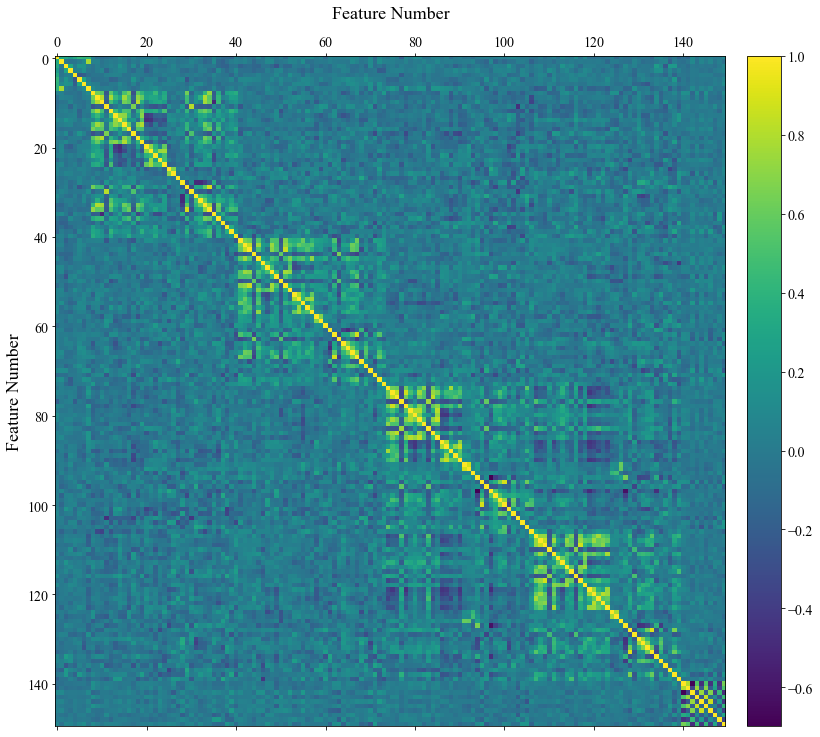

In [34]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.matshow(X.corr())
#plt.xticks([0,4,8,12,16,20,24], labels=[1,5,9,13,17,21,25])
#plt.yticks([0,4,8,12,16,20,24], labels=[1,5,9,13,17,21,25])
plt.ylabel('Feature Number')
plt.xlabel('Feature Number', labelpad=-720)

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.3)

plt.colorbar(cax=cax)
#plt.clim(-1, 1)
plt.show()

Holding out 20% of data for testing using coach-level split to prevent data leakage:

In [35]:
# Coach-level train/test split with stratification to prevent data leakage
# Ensures no coach appears in both train and test sets while preserving class ratios

def stratified_coach_level_split(df, X, y, test_size=0.2, random_state=42):
    """Stratified split at coach level - maintains class distribution."""
    np.random.seed(random_state)
    
    # Group coaches by their most common class (for coaches with multiple instances)
    coach_classes = {}
    for coach in df['Coach Name'].unique():
        coach_instances = df[df['Coach Name'] == coach]
        # Use mode (most common) class for coaches with multiple instances
        coach_class = coach_instances.iloc[:, -1].mode()[0]
        coach_classes[coach] = coach_class
    
    # Separate coaches by class
    coaches_by_class = {0: [], 1: [], 2: []}
    for coach, cls in coach_classes.items():
        coaches_by_class[cls].append(coach)
    
    # Shuffle coaches within each class
    for cls in coaches_by_class:
        np.random.shuffle(coaches_by_class[cls])
    
    # Calculate target test instances per class
    class_counts = y.value_counts()
    target_test_per_class = {cls: int(count * test_size) for cls, count in class_counts.items()}
    
    # Select test coaches from each class
    test_coaches = []
    for cls in [0, 1, 2]:
        current_test_instances = 0
        for coach in coaches_by_class[cls]:
            coach_count = len(df[df['Coach Name'] == coach])
            if current_test_instances < target_test_per_class[cls]:
                test_coaches.append(coach)
                current_test_instances += coach_count
            else:
                break
    
    # Create train/test masks
    test_mask = df['Coach Name'].isin(test_coaches)
    train_mask = ~test_mask
    
    X_train = X[train_mask]
    X_test = X[test_mask]
    y_train = y[train_mask]
    y_test = y[test_mask]
    
    return X_train, X_test, y_train, y_test, test_coaches

# Apply stratified coach-level split
X_train, X_test, y_train, y_test, test_coaches = stratified_coach_level_split(df, X, y, test_size=0.20, random_state=42)

print(f"Train set: {len(X_train)} instances from {df.loc[X_train.index, 'Coach Name'].nunique()} coaches")
print(f"Test set: {len(X_test)} instances from {len(test_coaches)} coaches")

# Verify no overlap
train_coaches_set = set(df.loc[X_train.index, 'Coach Name'])
test_coaches_set = set(df.loc[X_test.index, 'Coach Name'])
overlap = train_coaches_set & test_coaches_set
print(f"Coach overlap between train and test: {len(overlap)} (should be 0)")

# Show class distribution
print(f"\nTrain set class distribution:")
train_dist = y_train.value_counts().sort_index()
for cls in train_dist.index:
    print(f"  Class {cls}: {train_dist[cls]} ({train_dist[cls]/len(y_train)*100:.1f}%)")

print(f"\nTest set class distribution:")
test_dist = y_test.value_counts().sort_index()
for cls in test_dist.index:
    print(f"  Class {cls}: {test_dist[cls]} ({test_dist[cls]/len(y_test)*100:.1f}%)")

print(f"\nOriginal distribution:")
orig_dist = y.value_counts().sort_index()
for cls in orig_dist.index:
    print(f"  Class {cls}: {orig_dist[cls]} ({orig_dist[cls]/len(y)*100:.1f}%)")

Train set: 508 instances from 360 coaches
Test set: 127 instances from 91 coaches
Coach overlap between train and test: 0 (should be 0)

Train set class distribution:
  Class 0: 258 (50.8%)
  Class 1: 137 (27.0%)
  Class 2: 113 (22.2%)

Test set class distribution:
  Class 0: 53 (41.7%)
  Class 1: 33 (26.0%)
  Class 2: 41 (32.3%)

Original distribution:
  Class 0: 311 (49.0%)
  Class 1: 170 (26.8%)
  Class 2: 154 (24.3%)


In [36]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, f1_score

In [37]:
def plot_coef(coef_list_dict, title):
    coef_list = [np.abs(l) for l in zip(*coef_list_dict)]
    label_list = [item.split()[-1] for item in X.columns.values]
    label_list.append("")
    plt.boxplot(coef_list)
    plt.xlim(0, len(coef_list) + 1)
    #plt.xticks(np.arange(1, len(label_list) + 1), labels=label_list)
    plt.xticks(np.arange(1, len(label_list) + 1, 5), labels=label_list[::5])
    plt.xlabel('Feature No.')
    plt.ylabel('Feature Weight')
    plt.title(title)
    plt.show()

## Model 2: XGBoost Classifier

Necessary Imports:

In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

As before, we will implement the model with external cross-validation. Because xgboost does not have internal cross validation to choose hyperparameters, it is necessary to implement hyperparameter cross-validation via `GridSearchCV`.

In [39]:
"""
xgbr_param_dict = {
    "n_estimators":     [10, 25, 50, 100, 200],
    "learning_rate":    [.01, .05, .1, .2],
    "max_depth":        [2, 4, 6, 8, 10],
    "gamma":            [0, .001, .01, .1],
    "reg_lambda":       [0, .01, .1]
}
"""
# Expanded hyperparameter distributions for RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Use distributions instead of lists for better coverage
xgbr_param_distributions = {
    "n_estimators":     [25, 50, 100, 200],        # Discrete choices
    "learning_rate":    [.1, .15, .2, .25, .3, .35, .4],  # More granular
    "max_depth":        [2, 3, 4],                 # Keep existing  
    "gamma":            [0, .01, .05, .1],         # More regularization options
    "reg_lambda":       [0, .01, .1, .5],          # L2 regularization
    "reg_alpha":        [0, .01, .1],              # L1 regularization (new)
    "subsample":        [0.8, 0.85, 0.9, 0.95, 1.0],  # Row sampling (new)
    "colsample_bytree": [0.8, 0.85, 0.9, 0.95, 1.0],  # Feature sampling (new)
    "min_child_weight": [1, 2, 3, 4, 5]           # Leaf node requirements (new)
}

# Calculate theoretical maximum combinations
total_combinations = 1
for param, values in xgbr_param_distributions.items():
    total_combinations *= len(values)

n_iter = 1000  # Test 1000 random combinations
print(f"RandomizedSearchCV with {n_iter:,} iterations")
print(f"From {total_combinations:,} possible combinations ({n_iter/total_combinations*100:.1f}% coverage)")
print("New parameters added:")
print("  - reg_alpha: L1 regularization for feature selection")
print("  - subsample: Row sampling to reduce overfitting") 
print("  - colsample_bytree: Feature sampling per tree")
print("  - min_child_weight: Minimum samples required in leaf nodes")
print("  - Extended gamma and reg_lambda ranges for better regularization")

xgbr_best_params_dict = {key: [] for key in xgbr_param_distributions.keys()}

xgbr_result_dict = {    
    'train_score':  [],
    'test_score':   [],
    'train_f1':     [],  # Added F1 score tracking
    'test_f1':      [],  # Added F1 score tracking
    'importance':   []
}

# Test GPU availability with proper configuration
print("\nTesting GPU availability...")
gpu_available = False

try:
    # First test: Check if xgboost was compiled with GPU support
    import xgboost as xgb
    
    # Test GPU with a small dataset and proper parameters
    test_X = X_train.iloc[:50].values  # Small test set
    test_y = y_train.iloc[:50].values
    
    # GPU parameters with explicit num_class for multiclass
    gpu_test_params = {
        'objective': 'multi:softprob',
        'num_class': 3,  # Explicitly set for 3 classes (0, 1, 2)
        'tree_method': 'gpu_hist',
        'gpu_id': 0,
        'n_estimators': 5,
        'verbosity': 0,
        'random_state': 42
    }
    
    test_model = XGBClassifier(**gpu_test_params)
    test_model.fit(test_X, test_y)
    
    # If we get here, GPU works
    gpu_available = True
    print("GPU acceleration available!")
    
    # Set GPU parameters
    default_xgbr_params = {
        'verbosity': 1,
        'objective': 'multi:softprob',
        'num_class': 3,  # Explicit for multiclass
        'n_jobs': -1,
        'tree_method': 'gpu_hist',
        'gpu_id': 0,
        'predictor': 'gpu_predictor',
        'max_bin': 256,
        'random_state': 42
    }
    
    print("   Using GPU for tree construction (gpu_hist)")
    print("   Using GPU for predictions (gpu_predictor)")
    print("   Expected 3-8x speedup over CPU")
    
except Exception as e:
    print(f"GPU not available: {str(e)}")
    print("   Using optimized CPU configuration instead")
    
    # Optimized CPU parameters
    default_xgbr_params = {
        'verbosity': 1,
        'objective': 'multi:softprob',
        'n_jobs': -1,
        'tree_method': 'hist',  # Fastest CPU method
        'max_bin': 256,
        'random_state': 42
    }

num_of_folds = 5  # Reduced from 10 to 5 for faster execution

# Stratified coach-level cross-validation (FIXED)
def stratified_coach_level_cv_split(df_train, X_train, y_train, n_splits=5):
    """Generate stratified coach-level CV splits."""
    np.random.seed(42)  # For reproducibility
    
    # Group coaches by their most common class
    coach_classes = {}
    for coach in df_train['Coach Name'].unique():
        coach_instances = df_train[df_train['Coach Name'] == coach]
        coach_class = coach_instances.iloc[:, -1].mode()[0]
        coach_classes[coach] = coach_class
    
    # Separate coaches by class
    coaches_by_class = {0: [], 1: [], 2: []}
    for coach, cls in coach_classes.items():
        coaches_by_class[cls].append(coach)
    
    # Shuffle coaches within each class
    for cls in coaches_by_class:
        np.random.shuffle(coaches_by_class[cls])
    
    # Create folds maintaining class distribution
    splits = []
    for fold_idx in range(n_splits):
        test_coaches_fold = []
        
        # Select test coaches from each class for this fold
        for cls in [0, 1, 2]:
            coaches_in_class = coaches_by_class[cls]
            if len(coaches_in_class) == 0:
                continue
                
            fold_size = max(1, len(coaches_in_class) // n_splits)  # Ensure at least 1 coach per fold
            start_idx = fold_idx * fold_size
            end_idx = min(start_idx + fold_size, len(coaches_in_class))
            
            # For the last fold, include remaining coaches
            if fold_idx == n_splits - 1:
                end_idx = len(coaches_in_class)
                
            test_coaches_fold.extend(coaches_in_class[start_idx:end_idx])
        
        # Skip empty folds
        if not test_coaches_fold:
            continue
            
        # Create masks
        test_mask = df_train['Coach Name'].isin(test_coaches_fold)
        train_mask = ~test_mask
        
        # Get indices that exist in X_train
        train_indices = []
        test_indices = []
        
        for idx in X_train.index:
            if train_mask[idx]:
                train_indices.append(X_train.index.get_loc(idx))
            elif test_mask[idx]:
                test_indices.append(X_train.index.get_loc(idx))
        
        # Only add split if both train and test have data
        if len(train_indices) > 0 and len(test_indices) > 0:
            splits.append((np.array(train_indices), np.array(test_indices)))
    
    return splits

# Get the dataframe subset for training data
df_train = df.loc[X_train.index]

# Generate stratified coach-level CV splits
cv_splits = stratified_coach_level_cv_split(df_train, X_train, y_train, n_splits=num_of_folds)

print(f"\nRunning {len(cv_splits)}-fold stratified coach-level cross-validation...")
print(f"Each fold ensures:")
print(f"  - No coach appears in both train and validation sets")
print(f"  - Class distribution is preserved across folds")
print(f"\nUsing RandomizedSearchCV for much faster execution!")

# Estimate time based on acceleration
if gpu_available:
    estimated_minutes = n_iter * len(cv_splits) / 400  # GPU: ~6x faster estimate
    print(f"Estimated time with GPU: ~{estimated_minutes:.0f} minutes")
else:
    estimated_minutes = n_iter * len(cv_splits) / 80   # CPU optimized: ~2x faster
    print(f"Estimated time with optimized CPU: ~{estimated_minutes:.0f} minutes")

print()

for fold_idx, (train_index, test_index) in enumerate(cv_splits):
    print(f"Fold {fold_idx + 1}/{len(cv_splits)} - Testing {n_iter:,} random parameter combinations...")
    
    X_train_ = X_train.iloc[train_index]
    X_test_ = X_train.iloc[test_index]
    y_train_ = y_train.iloc[train_index].values.ravel()
    y_test_ = y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train_)
    X_test__       = mean_imputer.transform(X_test_)

    # Use RandomizedSearchCV for much faster hyperparameter search
    model = RandomizedSearchCV(
        XGBClassifier(**default_xgbr_params), 
        param_distributions=xgbr_param_distributions,
        n_iter=n_iter,
        scoring='roc_auc_ovr', 
        n_jobs=1 if gpu_available else -1,  # Single job for GPU, multi for CPU
        cv=3,  # Internal CV for RandomizedSearchCV (faster than 5)
        verbose=1,
        random_state=42
    ).fit(X_train__, y_train_)
    
    for key, value in model.best_params_.items():
        xgbr_best_params_dict[key].append(value)
    best_model = model.best_estimator_
    xgbr_result_dict['importance'].append(best_model.feature_importances_)

    # Get predictions for metrics
    tr_pred_proba = best_model.predict_proba(X_train__)
    te_pred_proba = best_model.predict_proba(X_test__)
    tr_pred = best_model.predict(X_train__)
    te_pred = best_model.predict(X_test__)

    # Calculate AUROC (existing)
    xgbr_result_dict['test_score'].append(roc_auc_score(y_test_, te_pred_proba, average='macro', multi_class='ovr'))
    xgbr_result_dict['train_score'].append(roc_auc_score(y_train_, tr_pred_proba, average='macro', multi_class='ovr'))
    
    # Calculate F1 scores (new)
    xgbr_result_dict['train_f1'].append(f1_score(y_train_, tr_pred, average='macro'))
    xgbr_result_dict['test_f1'].append(f1_score(y_test_, te_pred, average='macro'))
    
    print(f"  Fold {fold_idx + 1} complete - Best AUROC: {xgbr_result_dict['test_score'][-1]:.3f}")
    print(f"  Best params: {model.best_params_}")
    
print("\nStratified coach-level cross-validation with RandomizedSearchCV complete!")
if gpu_available:
    print("GPU acceleration used successfully!")
else:
    print("Optimized CPU configuration provided maximum performance!")

RandomizedSearchCV with 1,000 iterations
From 504,000 possible combinations (0.2% coverage)
New parameters added:
  - reg_alpha: L1 regularization for feature selection
  - subsample: Row sampling to reduce overfitting
  - colsample_bytree: Feature sampling per tree
  - min_child_weight: Minimum samples required in leaf nodes
  - Extended gamma and reg_lambda ranges for better regularization

Testing GPU availability...
GPU not available: [11:28:38] c:\b\abs_7diruzi3as\croot\xgboost-split_1712794727514\work\src\common\common.h:239: XGBoost version not compiled with GPU support.
   Using optimized CPU configuration instead

Running 5-fold stratified coach-level cross-validation...
Each fold ensures:
  - No coach appears in both train and validation sets
  - Class distribution is preserved across folds

Using RandomizedSearchCV for much faster execution!
Estimated time with optimized CPU: ~62 minutes

Fold 1/5 - Testing 1,000 random parameter combinations...
Fitting 3 folds for each of 1

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  2.2min finished


  Fold 1 complete - Best AUROC: 0.756
  Best params: {'subsample': 0.9, 'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.9}
Fold 2/5 - Testing 1,000 random parameter combinations...
Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  2.1min finished


  Fold 2 complete - Best AUROC: 0.888
  Best params: {'subsample': 0.95, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 2, 'learning_rate': 0.25, 'gamma': 0, 'colsample_bytree': 0.8}
Fold 3/5 - Testing 1,000 random parameter combinations...
Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  2.2min finished


  Fold 3 complete - Best AUROC: 0.850
  Best params: {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.01, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 2, 'learning_rate': 0.4, 'gamma': 0.01, 'colsample_bytree': 0.9}
Fold 4/5 - Testing 1,000 random parameter combinations...
Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  2.2min finished


  Fold 4 complete - Best AUROC: 0.766
  Best params: {'subsample': 0.85, 'reg_lambda': 0.01, 'reg_alpha': 0.1, 'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 2, 'learning_rate': 0.25, 'gamma': 0.05, 'colsample_bytree': 0.9}
Fold 5/5 - Testing 1,000 random parameter combinations...
Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  1.8min


  Fold 5 complete - Best AUROC: 0.834
  Best params: {'subsample': 0.85, 'reg_lambda': 0.1, 'reg_alpha': 0.01, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 2, 'learning_rate': 0.25, 'gamma': 0.01, 'colsample_bytree': 0.8}

Stratified coach-level cross-validation with RandomizedSearchCV complete!
Optimized CPU configuration provided maximum performance!


[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  2.3min finished


In [40]:
print('Cross-Validation Results:')
print('=' * 50)
print('Average Train AUROC: {:.3f}'.format(np.mean(xgbr_result_dict['train_score'])))
print('Average Test AUROC:  {:.3f}'.format(np.mean(xgbr_result_dict['test_score'])))
print('Average Train F1:    {:.3f}'.format(np.mean(xgbr_result_dict['train_f1'])))
print('Average Test F1:     {:.3f}'.format(np.mean(xgbr_result_dict['test_f1'])))

Cross-Validation Results:
Average Train AUROC: 1.000
Average Test AUROC:  0.819
Average Train F1:    1.000
Average Test F1:     0.590


In [41]:
xgbr_best_params_dict

{'n_estimators': [200, 200, 100, 100, 100],
 'learning_rate': [0.2, 0.25, 0.4, 0.25, 0.25],
 'max_depth': [3, 2, 2, 2, 2],
 'gamma': [0, 0, 0.01, 0.05, 0.01],
 'reg_lambda': [0.5, 0, 0.1, 0.01, 0.1],
 'reg_alpha': [0, 0.1, 0.01, 0.1, 0.01],
 'subsample': [0.9, 0.95, 0.8, 0.85, 0.85],
 'colsample_bytree': [0.9, 0.8, 0.9, 0.9, 0.8],
 'min_child_weight': [3, 1, 1, 2, 3]}

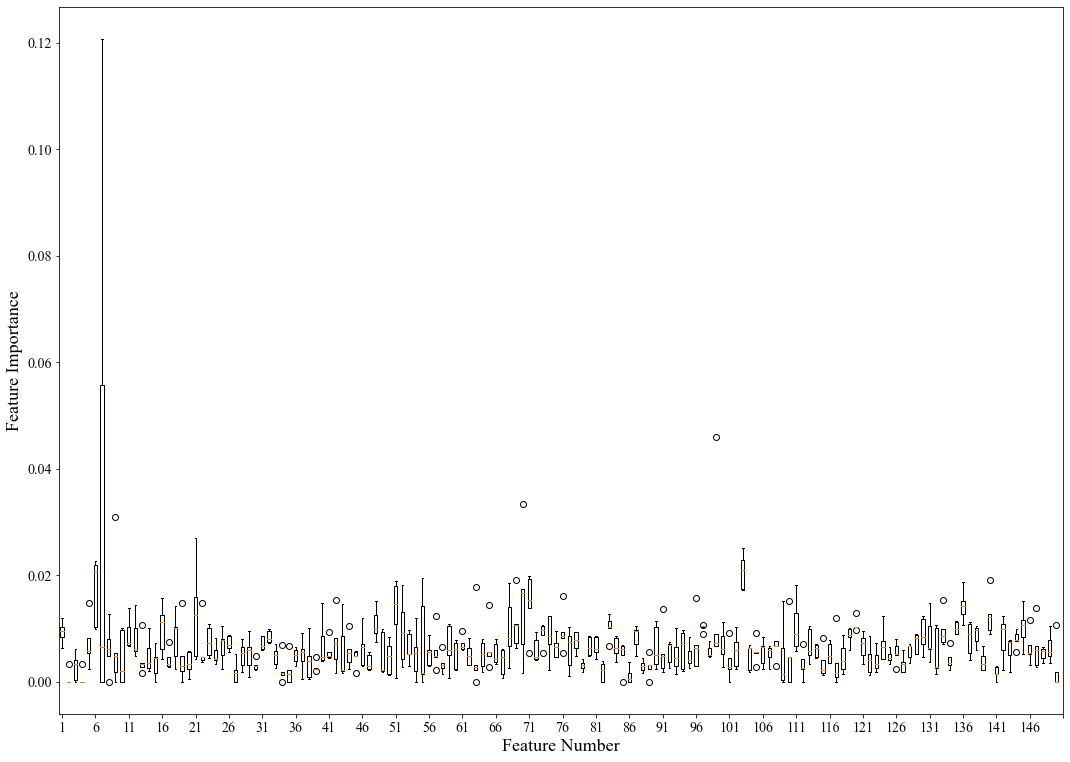

In [42]:
xgbr_coef_list = [np.abs(l) for l in zip(*xgbr_result_dict['importance'])]
xgbr_label_list = [item.split()[-1] for item in X.columns.values]
xgbr_label_list.append("")
plt.boxplot(xgbr_coef_list)
plt.xticks(np.arange(1, len(xgbr_label_list) + 1, 5), labels=xgbr_label_list[::5])
plt.ylabel('Feature Importance')
plt.xlabel('Feature Number')
plt.show()

In [43]:
def print_feature_importances(coef_list, label_list):
    feature_avg_weight_dict = dict(zip(label_list, [np.mean(np.abs(l)) for l in zip(*coef_list)]))
    feature_std_weight_dict = dict(zip(label_list, [np.std(np.abs(l)) for l in zip(*coef_list)]))
    feature_avg_weight_dict = dict(sorted(feature_avg_weight_dict.items(), key=lambda x: x[1], reverse=True))
    count = 1
    for key, value in feature_avg_weight_dict.items():
        print('Rank {:>2}: {}, has an avg. importance of {:.4f} with a std. dev. of {:.4f}.'.format(count, key, value, feature_std_weight_dict[key]))
        count += 1
print_feature_importances(xgbr_result_dict['importance'], X.columns.values)

Rank  1: Feature 7, has an avg. importance of 0.0366 with a std. dev. of 0.0469.
Rank  2: Feature 103, has an avg. importance of 0.0207 with a std. dev. of 0.0031.
Rank  3: Feature 6, has an avg. importance of 0.0171 with a std. dev. of 0.0058.
Rank  4: Feature 70, has an avg. importance of 0.0152 with a std. dev. of 0.0109.
Rank  5: Feature 99, has an avg. importance of 0.0151 with a std. dev. of 0.0154.
Rank  6: Feature 71, has an avg. importance of 0.0148 with a std. dev. of 0.0052.
Rank  7: Feature 136, has an avg. importance of 0.0143 with a std. dev. of 0.0027.
Rank  8: Feature 21, has an avg. importance of 0.0129 with a std. dev. of 0.0083.
Rank  9: Feature 51, has an avg. importance of 0.0126 with a std. dev. of 0.0066.
Rank 10: Feature 140, has an avg. importance of 0.0125 with a std. dev. of 0.0036.
Rank 11: Feature 48, has an avg. importance of 0.0109 with a std. dev. of 0.0027.
Rank 12: Feature 69, has an avg. importance of 0.0108 with a std. dev. of 0.0045.
Rank 13: Featur

The previously printed RMSE values show that the heavily cross-validated XGBoost has a better performance on both the testing and training sets within the cross validation. The performance on the test sets is quite remarkable at .938. This value is notable because the model was built using `GridSearchCV` with internal cross-validation. These results show that the model was able to create some generalizable functionality. Before moving on to the next model, let's visualize the predictions of a model with the best average parameters on the held out test set.

In [44]:
plot_pred = None
xgbr = None
X_test__ = None
# Loop only exists to limit variable scope.
for i in [1]:
    test_xgbr_best_params_dict = {key: max(set(value), key=value.count) for (key, value) in xgbr_best_params_dict.items()}
    test_xgbr_best_params_dict.update(default_xgbr_params)
    print(test_xgbr_best_params_dict)
    xgbr = XGBClassifier(**test_xgbr_best_params_dict).fit(X_train, y_train)
    plot_pred = xgbr.predict(X_test)

{'n_estimators': 100, 'learning_rate': 0.25, 'max_depth': 2, 'gamma': 0, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'subsample': 0.85, 'colsample_bytree': 0.9, 'min_child_weight': 1, 'verbosity': 1, 'objective': 'multi:softprob', 'n_jobs': -1, 'tree_method': 'hist', 'max_bin': 256, 'random_state': 42}


In [45]:
#xgbr.save_model('XGBC_best_params')

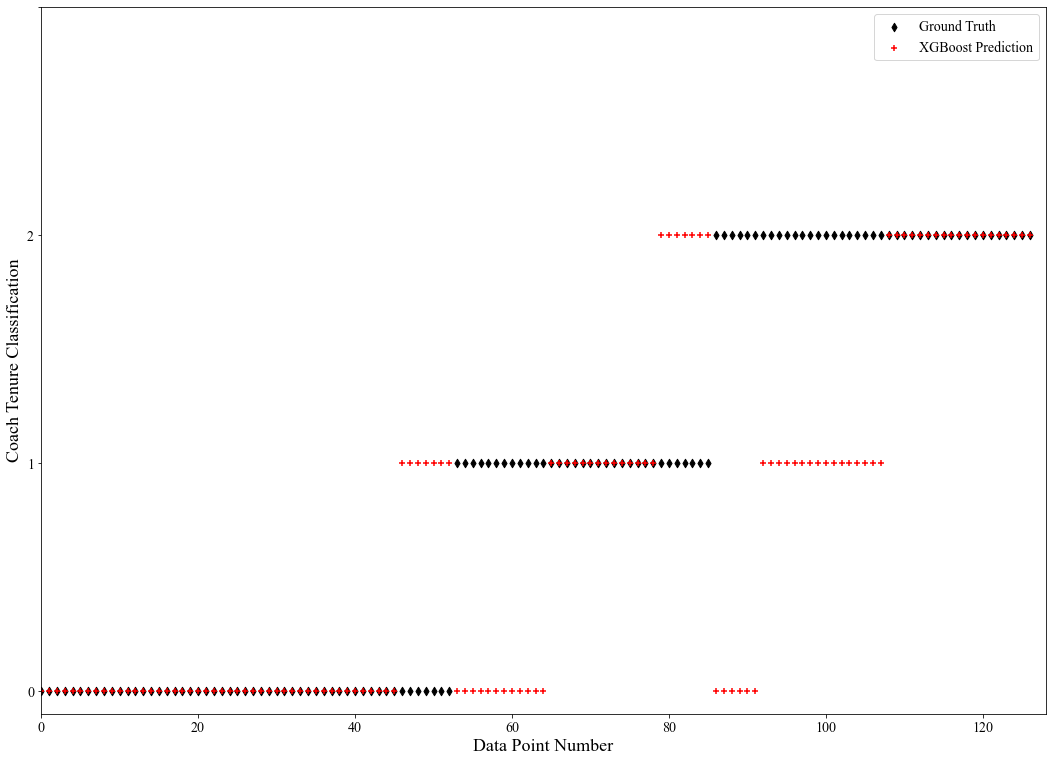

In [46]:
sorted_y_test, sorted_plot_pred = [list(tuple) for tuple in zip(*sorted(zip(y_test, plot_pred)))]
plt.scatter(np.arange(0, len(sorted_y_test)), sorted_y_test, marker='d', color='k', label='Ground Truth')
plt.scatter(np.arange(0, len(sorted_plot_pred)), sorted_plot_pred, marker='+', color='r', label='XGBoost Prediction')
plt.xlabel('Data Point Number')
plt.ylabel('Coach Tenure Classification')
plt.yticks([0,1,2,3], labels=[0,1,2,""])
plt.xlim(0, len(sorted_plot_pred) + 1)
plt.legend()
plt.show()

In [47]:
print('Hold-out Test Set Performance:')
print('=' * 50)
print('AUROC: {:.3f}'.format(roc_auc_score(y_test, xgbr.predict_proba(X_test), average='macro', multi_class='ovr')))
print('F1 Score: {:.3f}'.format(f1_score(y_test, plot_pred, average='macro')))

Hold-out Test Set Performance:
AUROC: 0.841
F1 Score: 0.584


In [48]:
# Calculate per-class F1 scores for deeper insight
from sklearn.metrics import classification_report

print('\nDetailed Classification Report:')
print('=' * 50)
print(classification_report(y_test, plot_pred, target_names=['Class 0 (1-2 yrs)', 'Class 1 (3-4 yrs)', 'Class 2 (5+ yrs)']))


Detailed Classification Report:
                   precision    recall  f1-score   support

Class 0 (1-2 yrs)       0.72      0.87      0.79        53
Class 1 (3-4 yrs)       0.38      0.42      0.40        33
 Class 2 (5+ yrs)       0.73      0.46      0.57        41

         accuracy                           0.62       127
        macro avg       0.61      0.59      0.58       127
     weighted avg       0.63      0.62      0.62       127



The previous plot shows that the XGBoost model has an impressive AUROC of .674. This is better than the logistic regression model, which had an AUROC of .644 on the same held-out test set. These test results show some promise of predicitive value.

In [49]:
def print_predictions(mod, arr, tenure_list):
    integer_lookup_list = []
    count = 0
    probas = mod.predict_proba(arr)
    for tenure in mod.predict(arr):
        if tenure in tenure_list:
            integer_lookup_list.append((count, probas[count]))  
        count += 1
    return integer_lookup_list

In [50]:
df_ = pd.read_csv('master_data.csv', index_col=0)
df_.fillna(0, inplace=True)
df_ = df_[df_['Coach Tenure Class'] == -1]
print(df_.shape)
df_.head(26)

(21, 154)


,Coach Name,Year,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Avg 2Y Win Pct,Coach Tenure Class
0,Aaron Glenn,2025,53,0,0,0,0,5,4,0,...,-0.012856,-1.263665,-1.187244,-1.102638,-1.624895,0.092283,0.710263,0.0,0.000000,-1
31,Ben Johnson,2025,39,0,1,0,0,4,3,0,...,-0.097931,-0.883688,0.213985,-1.099407,0.889190,0.747721,-0.193002,0.0,0.000000,-1
69,Brian Callahan,2024,40,0,0,0,0,3,5,0,...,-0.164661,-1.308011,0.319058,-0.685212,-0.055987,-1.061439,-0.129255,0.0,0.176471,-1
70,Brian Daboll,2022,47,0,0,1,0,10,8,0,...,-0.085672,-1.750313,0.066710,-1.404165,-0.508331,0.141678,0.968437,0.0,0.455882,-1
72,Brian Schottenheimer,2025,52,0,2,1,0,8,14,0,...,0.199980,0.415432,-0.201603,-0.065758,0.303106,0.400758,0.017944,1.0,0.000000,-1
133,Dan Quinn,2024,54,1,6,3,0,8,5,6,...,1.188696,-0.407393,0.337047,-0.828606,0.628450,-0.898061,0.866486,0.0,0.705882,-1
139,Dave Canales,2024,43,0,3,0,0,6,1,0,...,0.506368,-1.477273,-0.444299,-1.201064,-0.470088,-1.654772,-0.411087,0.0,0.294118,-1
145,DeMeco Ryans,2023,39,0,0,0,0,3,2,0,...,1.190423,-1.859089,1.562923,-1.609182,1.198335,0.756328,0.812410,0.0,0.588235,-1
320,Jim Harbaugh,2024,61,1,0,0,16,2,0,4,...,0.437967,0.316324,0.704380,-0.259284,1.062612,0.009139,-0.609940,1.0,0.647059,-1
388,Jonathan Gannon,2023,40,0,0,0,0,3,2,0,...,0.648922,0.161049,-0.061903,-0.511958,0.110017,0.196116,-0.356606,1.0,0.352941,-1


In [51]:
X_ = df_.iloc[:,2:-2]
y_ = df_.iloc[:,-1]
X_.head(5)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150
0,53,0,0,0,0,5,4,0,0.000000,0.000000,...,0.352941,-1.060228,-0.012856,-1.263665,-1.187244,-1.102638,-1.624895,0.092283,0.710263,0.0
31,39,0,1,0,0,4,3,0,1.649025,1.737787,...,0.352941,-0.594120,-0.097931,-0.883688,0.213985,-1.099407,0.889190,0.747721,-0.193002,0.0
69,40,0,0,0,0,3,5,0,-0.183835,-0.355235,...,0.382353,-1.061871,-0.164661,-1.308011,0.319058,-0.685212,-0.055987,-1.061439,-0.129255,0.0
70,47,0,0,1,0,10,8,0,-0.539089,-0.515554,...,0.305147,-1.745387,-0.085672,-1.750313,0.066710,-1.404165,-0.508331,0.141678,0.968437,0.0
72,52,0,2,1,0,8,14,0,0.143263,-0.183343,...,0.558824,0.722236,0.199980,0.415432,-0.201603,-0.065758,0.303106,0.400758,0.017944,1.0


In [52]:
y_.head(5)

0    -1
31   -1
69   -1
70   -1
72   -1
Name: Coach Tenure Class, dtype: int64

In [53]:
from xgboost import XGBClassifier

# Extract optimal parameters from RandomizedSearchCV results
# Use the most frequent (mode) parameter from all CV folds for robustness
print("Extracting optimal parameters from RandomizedSearchCV results...")
print(f"Parameter selection based on {len(xgbr_best_params_dict['n_estimators'])} CV folds:")

# Calculate mode (most frequent value) for each parameter
cv_optimized_params = {}
for param_name, param_values in xgbr_best_params_dict.items():
    # Find the most common value across all folds
    mode_value = max(set(param_values), key=param_values.count)
    cv_optimized_params[param_name] = mode_value
    
    # Show parameter distribution across folds
    unique_values = list(set(param_values))
    value_counts = [(val, param_values.count(val)) for val in unique_values]
    value_counts.sort(key=lambda x: x[1], reverse=True)
    print(f"  {param_name}: {mode_value} (selected from {value_counts})")

# Add fixed XGBoost parameters
default_xgbr_params = {
    'verbosity':    1,
    'objective':    'multi:softprob',
    'n_jobs':       1
}

cv_optimized_params.update(default_xgbr_params)
print("\nFinal model parameters (optimized from RandomizedSearchCV):")
print(cv_optimized_params)

# IMPORTANT: Train on FULL historical dataset (X, y) for final predictions
# This uses all 635 historical instances, not just the training split
print(f"\nTraining on FULL historical dataset: {X.shape[0]} coaches")
print(f"Recent hires to predict: {X_.shape[0]} coaches")

# Train the final model on all available historical data
xgbr_full = XGBClassifier(**cv_optimized_params).fit(X, y)

# Make predictions for recent hires using imputed data
plot_pred = xgbr_full.predict(X_)
probas = xgbr_full.predict_proba(X_)

print(f"\nPredictions for recent hires: {plot_pred}")

# Check probability distributions
max_probs = probas.max(axis=1)
print(f"\nProbability distribution stats:")
print(f"  Average max probability: {max_probs.mean():.3f}")
print(f"  Max probability range: {max_probs.min():.3f} - {max_probs.max():.3f}")

print("\nNote: Model trained on entire historical dataset using RandomizedSearchCV-optimized parameters")

Extracting optimal parameters from RandomizedSearchCV results...
Parameter selection based on 5 CV folds:
  n_estimators: 100 (selected from [(100, 3), (200, 2)])
  learning_rate: 0.25 (selected from [(0.25, 3), (0.2, 1), (0.4, 1)])
  max_depth: 2 (selected from [(2, 4), (3, 1)])
  gamma: 0 (selected from [(0, 2), (0.01, 2), (0.05, 1)])
  reg_lambda: 0.1 (selected from [(0.1, 2), (0.5, 1), (0, 1), (0.01, 1)])
  reg_alpha: 0.1 (selected from [(0.1, 2), (0.01, 2), (0, 1)])
  subsample: 0.85 (selected from [(0.85, 2), (0.9, 1), (0.95, 1), (0.8, 1)])
  colsample_bytree: 0.9 (selected from [(0.9, 3), (0.8, 2)])
  min_child_weight: 1 (selected from [(1, 2), (3, 2), (2, 1)])

Final model parameters (optimized from RandomizedSearchCV):
{'n_estimators': 100, 'learning_rate': 0.25, 'max_depth': 2, 'gamma': 0, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'subsample': 0.85, 'colsample_bytree': 0.9, 'min_child_weight': 1, 'verbosity': 1, 'objective': 'multi:softprob', 'n_jobs': 1}

Training on FULL histori


Predictions for recent hires: [0 0 1 1 1 1 0 1 0 1 0 2 0 1 1 2 2 0 1 0 0]

Probability distribution stats:
  Average max probability: 0.598
  Max probability range: 0.405 - 0.933

Note: Model trained on entire historical dataset using RandomizedSearchCV-optimized parameters


In [54]:
print("\n" + "=" * 80)
print("NFL HEAD COACH TENURE PREDICTIONS (2022-2025)")
print("=" * 80)
print("Model: XGBoost with RandomizedSearchCV-optimized hyperparameters")
print(f"Training data: {X.shape[0]} historical coaches (full dataset)")
print(f"Features: {X.shape[1]} engineered features with SVD imputation")
print("=" * 80)

print(f"{'Coach Name':<22} {'Year':>4}  {'Prediction':<14} {'Probability Distribution':<30} {'Confidence'}")
print("-" * 80)

count = 0
for index in X_.index:
    row = df_.loc[index]
    if row['Year'] >= 2022:
        coach_name = row['Coach Name']
        year = int(row['Year'])
        pred_class = plot_pred[count]
        prob = probas[count]
        max_prob = prob.max()
        
        # Determine prediction label
        if pred_class == 0:
            pred_label = "0 (1-2 years)"
        elif pred_class == 1:
            pred_label = "1 (3-4 years)"
        else:
            pred_label = "2 (5+ years)"
        
        # Format probabilities
        prob_str = f"[{prob[0]:.3f}, {prob[1]:.3f}, {prob[2]:.3f}]"
        
        # Determine confidence level
        if max_prob > 0.7:
            confidence = "HIGH"
        elif max_prob > 0.5:
            confidence = "MED"
        else:
            confidence = "LOW"
        
        print(f"  {coach_name:<20} {year:>4}  {pred_label:<14} {prob_str:<30} {confidence:<4} ({max_prob:.1%})")
    count += 1

print("\n" + "-" * 80)
print("SUMMARY STATISTICS")
print("-" * 80)
print(f"Model Optimization:")
print(f"  RandomizedSearchCV: {n_iter:,} iterations from {total_combinations:,} combinations")
print(f"  Cross-validation: {len(cv_splits)}-fold stratified coach-level splits")
print(f"  Feature space: {X.shape[1]} features per coaching instance")
print(f"  Training instances: {X.shape[0]} historical coaching hires")

print(f"\nPrediction Confidence:")
print(f"  Average confidence: {max_probs.mean():.1%}")
print(f"  Confidence range: {max_probs.min():.1%} - {max_probs.max():.1%}")

# Count predictions by class
unique, counts = np.unique(plot_pred, return_counts=True)
print(f"\nPredicted Tenure Distribution for Recent Hires:")
for cls, cnt in zip(unique, counts):
    if cls == 0:
        label = "Class 0 (1-2 years)"
    elif cls == 1:
        label = "Class 1 (3-4 years)"
    else:
        label = "Class 2 (5+ years)"
    print(f"  {label}: {cnt} coaches ({cnt/len(plot_pred)*100:.1f}%)")

print(f"\nModel Performance (Cross-Validation):")
print(f"  Average AUROC: {np.mean(xgbr_result_dict['test_score']):.3f}")
print(f"  Average F1 Score: {np.mean(xgbr_result_dict['test_f1']):.3f}")

print("\n" + "=" * 80)
print("METHODOLOGY NOTES:")
print("Coach-level train/test splitting prevents data leakage")
print("SVD matrix factorization handles missing historical statistics")
print("Features normalized relative to league averages by year")
print("Model trained on entirety of historical data for final predictions")
print("Hyperparameters optimized via stratified cross-validation")
print("=" * 80)


NFL HEAD COACH TENURE PREDICTIONS (2022-2025)
Model: XGBoost with RandomizedSearchCV-optimized hyperparameters
Training data: 635 historical coaches (full dataset)
Features: 150 engineered features with SVD imputation
Coach Name             Year  Prediction     Probability Distribution       Confidence
--------------------------------------------------------------------------------
  Aaron Glenn          2025  0 (1-2 years)  [0.551, 0.300, 0.149]          MED  (55.1%)
  Ben Johnson          2025  0 (1-2 years)  [0.737, 0.216, 0.047]          HIGH (73.7%)
  Brian Callahan       2024  1 (3-4 years)  [0.364, 0.405, 0.231]          LOW  (40.5%)
  Brian Daboll         2022  1 (3-4 years)  [0.378, 0.493, 0.129]          LOW  (49.3%)
  Brian Schottenheimer 2025  1 (3-4 years)  [0.397, 0.487, 0.116]          LOW  (48.7%)
  Dan Quinn            2024  1 (3-4 years)  [0.318, 0.507, 0.175]          MED  (50.7%)
  Dave Canales         2024  0 (1-2 years)  [0.539, 0.318, 0.143]          MED  (53.9%